# **Find Similar Movies from Plot Summaries - by AHMED**

# **Dataset :**

In [51]:
import pandas as pd

In [52]:
data = pd.read_csv('movies.csv')

In [53]:
data.head()

,rank,title,genre,wiki_plot,imdb_plot
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1..."


nembre de movies dans le jeu de donnée :

In [54]:
len(data)

100

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rank       100 non-null    int64 
 1   title      100 non-null    object
 2   genre      100 non-null    object
 3   wiki_plot  100 non-null    object
 4   imdb_plot  90 non-null     object
dtypes: int64(1), object(4)
memory usage: 4.0+ KB


les données nulls sont :

In [56]:
data.isnull().sum()

,0
rank,0
title,0
genre,0
wiki_plot,0
imdb_plot,10


# **Text Preprocessing:**

## Combiner les résumés des deux sources.

In [57]:
data['combiner'] = data['wiki_plot'].astype(str) + ' ' + data['imdb_plot'].astype(str)

## la tokenisation pour diviser le texte en unités (mots ou phrases)

import library :

In [60]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

cree un nouveau colonne pour ajoute les phrases se forme des mots diviser :

In [61]:
data['tokens'] = data['combiner'].apply(word_tokenize)

In [62]:
data['tokens'].head()

,tokens
0,"[On, the, day, of, his, only, daughter, 's, we..."
1,"[In, 1947, ,, banker, Andy, Dufresne, is, conv..."
2,"[In, 1939, ,, the, Germans, move, Polish, Jews..."
3,"[In, a, brief, scene, in, 1964, ,, an, aging, ..."
4,"[It, is, early, December, 1941, ., American, e..."


## la racisation (stemming) pour réduire les mots à leur forme racine:

In [63]:
from nltk.stem import PorterStemmer

In [64]:
stm = PorterStemmer()

In [65]:
data['tokens_stm'] = data['tokens'].apply(lambda x: [stm.stem(word) for word in x])

In [66]:
data['tokens_stm'].head()

,tokens_stm
0,"[on, the, day, of, hi, onli, daughter, 's, wed..."
1,"[in, 1947, ,, banker, andi, dufresn, is, convi..."
2,"[in, 1939, ,, the, german, move, polish, jew, ..."
3,"[in, a, brief, scene, in, 1964, ,, an, age, ,,..."
4,"[it, is, earli, decemb, 1941, ., american, exp..."


## **Convertir le texte en données numériques :**

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [68]:
vec = TfidfVectorizer(stop_words='english')

In [70]:
tfidf_matrix = vec.fit_transform(data['combiner'])

In [71]:
tfidf_matrix.shape

(100, 15790)

# **Clustering avec KMeans :**

In [72]:
from sklearn.cluster import KMeans

In [73]:
kmeans = KMeans(n_clusters=5, random_state=42)

In [74]:
data['cluster'] = kmeans.fit_predict(tfidf_matrix)

In [75]:
# Afficher les films dans chaque cluster
for cluster_num in range(5):
    print(f"Cluster {cluster_num}:")
    print(data[data['cluster'] == cluster_num]['title'].head())

Cluster 0:
34                 Gladiator
37                Unforgiven
41    The Philadelphia Story
42     To Kill a Mockingbird
61           The Deer Hunter
Name: title, dtype: object
Cluster 1:
7            Citizen Kane
13           Sunset Blvd.
14                Vertigo
23              Chinatown
25    Singin' in the Rain
Name: title, dtype: object
Cluster 2:
0              The Godfather
3                Raging Bull
11    The Godfather: Part II
15         On the Waterfront
27          Some Like It Hot
Name: title, dtype: object
Cluster 3:
9                      Titanic
17          The Sound of Music
18             West Side Story
22    The Silence of the Lambs
31              Apocalypse Now
Name: title, dtype: object
Cluster 4:
1           The Shawshank Redemption
2                   Schindler's List
4                         Casablanca
5    One Flew Over the Cuckoo's Nest
6                 Gone with the Wind
Name: title, dtype: object


## Calcul de la distance de similarité :

Note :

---

Considérons les deux phrases suivantes du film Le Magicien d'Oz :

"they find in the Emerald City"

---


"they finally reach the Emerald City"

---


Analyse avec un CountVectorizer :
Le CountVectorizer crée un vocabulaire unique à partir des mots dans ces phrases :
"they, find, in, the, Emerald, City, finally, reach"

Chaque phrase est ensuite transformée en un vecteur selon ce vocabulaire, où :

Un "1" indique la présence d’un mot dans la phrase.
Un "0" indique son absence.
Vecteurs générés :

Phrase 1 : [1, 1, 1, 1, 1, 1, 0, 0]
Phrase 2 : [1, 0, 0, 1, 1, 1, 1, 1]
Calcul de la similarité cosinus :
La similarité cosinus mesure l’angle entre deux vecteurs :

Si l'angle est proche de 0° (cosine ≈ 1), les phrases sont très similaires.
Si l'angle est proche de 90° (cosine ≈ 0), les phrases sont très différentes.
Dans cet exemple, la similarité cosinus est 0.667, ce qui indique que les phrases sont très similaires.

Calcul de la distance de similarité :
La distance de similarité est définie par :
Distance = 1 - Similarité cosinus

Ici :
Distance = 1 - 0.667 = 0.333
Plus la distance est proche de 0, plus les phrases sont similaires.

In [77]:
from sklearn.metrics.pairwise import cosine_similarity

In [78]:
cosinus_sim = cosine_similarity(tfidf_matrix)

In [79]:
cosinus_sim[0]

array([1.        , 0.01104351, 0.01681739, 0.02085154, 0.01299732,
       0.01116449, 0.01599147, 0.01846433, 0.01247745, 0.01651507,
       0.01236326, 0.60823213, 0.02430198, 0.01898437, 0.00985778,
       0.03391188, 0.01758838, 0.03139466, 0.01581181, 0.01525975,
       0.12976834, 0.01197836, 0.01497269, 0.02105111, 0.01803571,
       0.06894672, 0.02400749, 0.01462674, 0.01462155, 0.0189945 ,
       0.01211238, 0.01525628, 0.01880344, 0.01443961, 0.01897124,
       0.01264315, 0.02569048, 0.01682642, 0.00964651, 0.02265493,
       0.0161793 , 0.0231383 , 0.03682229, 0.01298021, 0.03350901,
       0.01001856, 0.01212237, 0.02039048, 0.03331511, 0.02958776,
       0.02565127, 0.0160295 , 0.0121554 , 0.01412773, 0.01758579,
       0.01878194, 0.01602746, 0.01152159, 0.02445592, 0.04810351,
       0.01555373, 0.04774776, 0.02480626, 0.02310075, 0.02964844,
       0.01942988, 0.03167841, 0.02011703, 0.01944477, 0.01629033,
       0.03482157, 0.02089964, 0.02284662, 0.01456109, 0.01776

## Importation de Matplotlib, Linkage et Dendrogrammes

In [80]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [81]:
linked = linkage(tfidf_matrix.toarray(), method='ward')

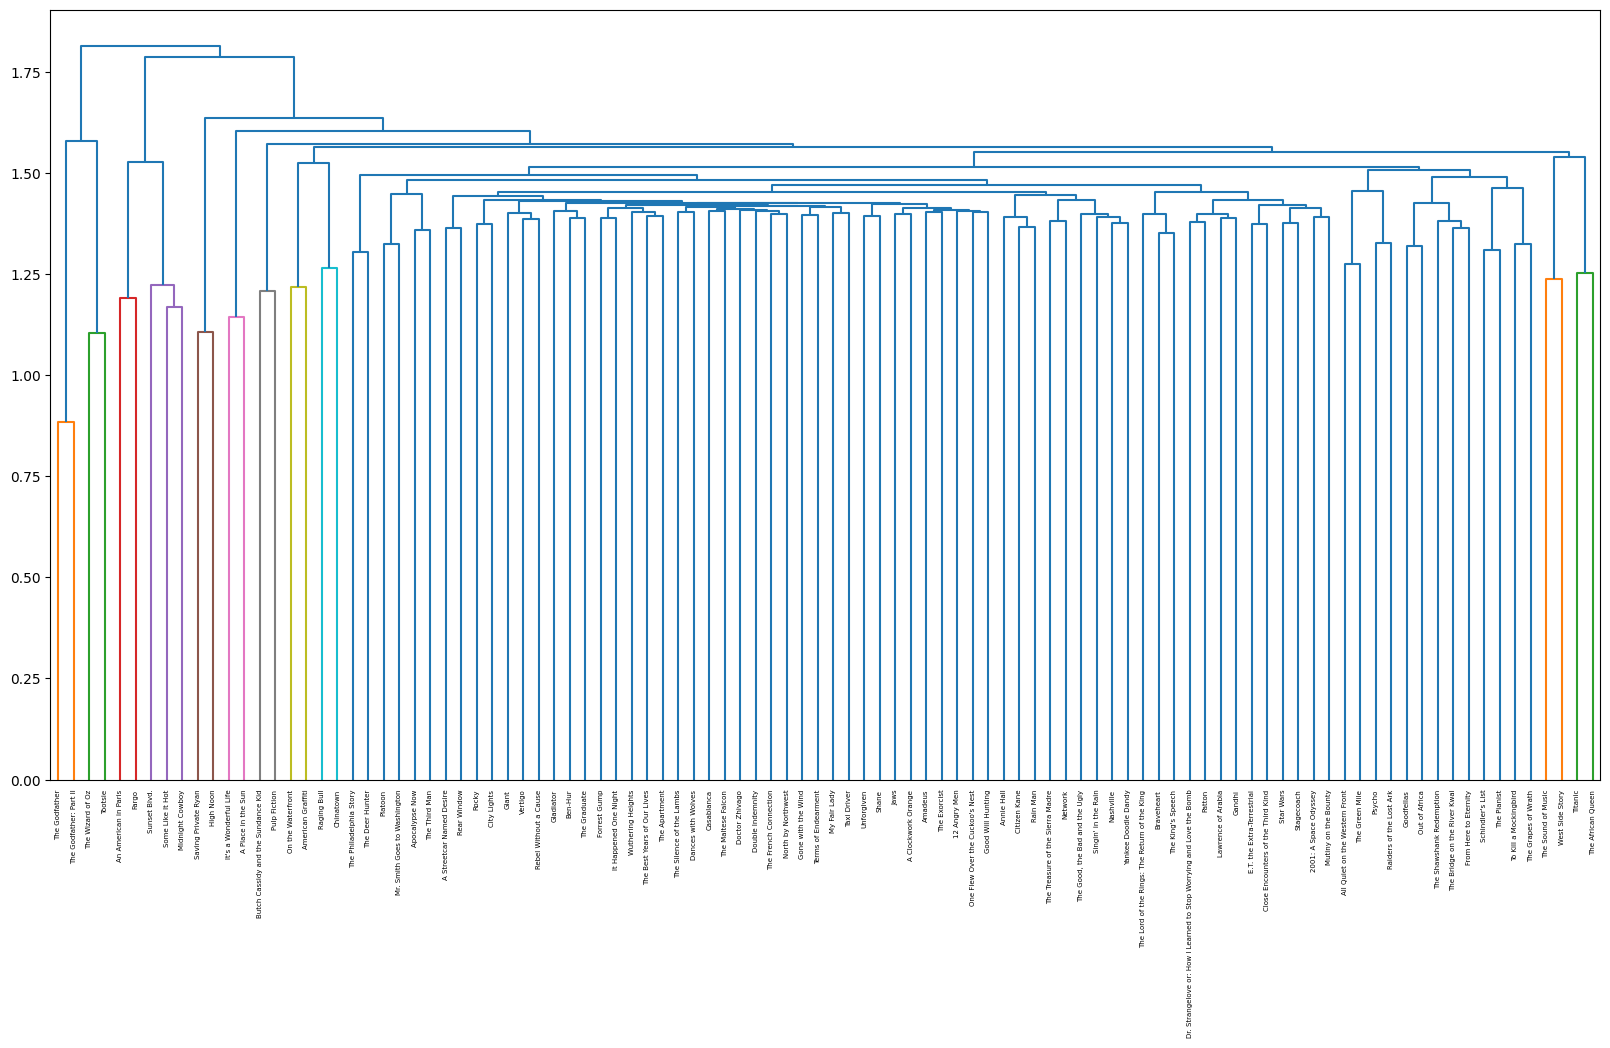

In [83]:
# le dendrogramme
plt.figure(figsize=(20, 10))
dendrogram(linked, labels=data['title'].to_numpy())
plt.show()

# **Identification des films les plus similaires:**

**La fonction most_similar_movies permet de trouver les films les plus similaires en fonction de leur indice dans une matrice de similarité. Elle trie les films par similarité cosinus et renvoie les titres des films les plus proches du film de référence.**

les indices des films :

In [90]:
def indice_film(title):
    return data[data['title'] == title].index[0]

In [91]:
indice_film('The Godfather')

0

In [87]:
# Identifier les films les plus similaires (par exemple, basés sur la similarité cosinus)
def most_similar_movies(movie_idx, similarity_matrix, top_n=5):
    similar_scores = similarity_matrix[movie_idx]
    similar_movies_idx = similar_scores.argsort()[-top_n-1:-1]  # Les top N films les plus similaires
    return data.iloc[similar_movies_idx]['title']

# Trouver les films les plus similaires au premier film
most_similar_movies(0, cosinus_sim, top_n=3)


,title
20,E.T. the Extra-Terrestrial
75,Tootsie
11,The Godfather: Part II
